In [3]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [73]:
function show_f_reduced(axs,fig,font,param,f; c = "?", point = 1, Δϕ = 0.001)

    @unpack v0, ϕa, ϕp, Nx = param

    

    ax1 = axs[1]

    ax2 = axs[2]

    profile_f(ax1,font,param,f)

    ax1.get_xaxis().set_ticks(0:0.25:1)

    ax1.set_xticklabels([L"-0.50",L"-0.25",L"0.0",L"0.25",L"0.50"])

    ax1.set_xlabel(L"\bar z",fontsize = font*1.2)

    

    plot_phase_reduced(fig, ax2, param["v0"], font; Lxs = [], Δϕ = 0.001)

    ax2.plot(f[:,1]+f[:,2],f[:,3]; color = "black", label = L"(\rho_a, \rho_p)")

    ax2.legend(loc = "upper right", fontsize=font, edgecolor = "white")

    # check densities

    ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx

    if ϕp ≈ ( param["ϕp"] )

    ϕp = param["ϕp"]

    else

    ϕp = d2(ϕp)

    end

    ϕa = sum(f[:,1:2])/Nx

    if ϕa ≈ ( param["ϕa"] )

    ϕa = param["ϕa"]

    else

    ϕa = d2(ϕa)

    end

    #



        if c >0

    c = d2(c)

    end

    normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)

    fig.subplots_adjust(top=0.85)

    latex_string = latexstring("\$ \\phi_a = $(ϕa), \\phi_p = $(ϕp), \\mathrm{Pe}=$(v0), L_2 = $(d4(normf)), c = $(c)\$")

    # fig.suptitle(latex_string; fontsize = font, y=0.90)



    # plot markers

    rho = sum(f; dims = 2)[:,1]

    for (i,label,shift1,shift2) in zip( [Nx÷2, Nx÷2+1, point], ["B","C","A"],[[0.01, 0.01],[0.01, -0.05],[0.00, -0.04]],[[0.01, 0.0],[-0.03, 0.0],[0.0, 0.005]])

    ax1.scatter((i+1)/Nx, rho[i]; c = "none", edgecolors = "black", marker = "o",s = 5, zorder=3)

    ax1.text((i+1)/Nx+shift1[1], rho[i]+shift1[2], label; fontsize=font/1.2,zorder=3)

    ax2.scatter(f[i,1]+f[i,2], f[i,3]; c = "none", edgecolors = "black", marker = "o",s = 5,zorder=3)

    ax2.text(f[i,1]+f[i,2]+shift2[1], f[i,3]+shift2[2], label; fontsize=font/1.2,zorder=3)

    end



    ax2.scatter(ϕa, ϕp; c = "black", marker = "x" ,zorder=3)



    # fig_name = "show_f"

    # @unpack v0, Lx, Δx = param

    # pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";

    # mkpath(pathname)

    # filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/Lx=$(Lx)_Δx=$(Δx)_Pe=$(v0)_ϕa=$(ϕa)_ϕp=$(ϕp).pdf";

    # PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


    # display(fi        g)
end
  
function plot_phase_reduced(fig, ax, Pe, font; Lxs = [5,10,20], Δϕ = 0.01)

        Pes = [Pe]

        axlims = [[0.0, 1.0, 0, 0.4]]

        axs = [ax]

        for (i,(ax, Pe, axlim)) in enumerate(zip(axs, Pes, axlims))

        # load binodal

        filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"

        data = wload(filename)

        @unpack Pe, γs, ϕ1s, ϕ2s = data

        # plot binodal

        # binod = ax.plot(gammas_converter_a(γs, ϕ1s), gammas_converter_p(γs, ϕ1s), color = "red", label = "Binodal")

        # ax.plot(gammas_converter_a(γs, ϕ2s), gammas_converter_p(γs, ϕ2s), color = "red", label = "_Bindoal")

        #ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")

        

        rc("text", usetex=true)

        ax.xaxis.set_tick_params(labelsize=font)

        ax.xaxis.tick_bottom()

        ax.yaxis.set_tick_params(labelsize=font)

        #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)

        ax.set_xlabel(L"\phi_a",fontsize=font)

        ax.set_ylabel(L"\phi_p", fontsize=font)

        # ax.legend(loc = "upper right", fontsize=20)

        # ax.set_aspect(0.25*Δρ/ΔPe)

        title = latexstring("\$ \\mathrm{Pe} = $(Pe)\$")

        #ax.set_title(title,fontsize=font)

        ax.tick_params(labelbottom = true, direction = "in")

        #

        # # plot finite spin

        # for Lx in Lxs

        # local ϕas_left, ϕas_right, ϕps

        # ϕas_left, ϕas_right, ϕps = return_spin_finite(;Pe = Pe, Δϕ = Δϕ,Lx=Lx)

        # ax.plot(ϕas_left, ϕps, color = "blue", label = "_spinodal", linestyle = "--", alpha = 0.5)

        # ax.plot(ϕas_right, ϕps, color = "blue", label = "_spinodal", linestyle = "--", alpha = 0.5)

        # # find final find gamma

        # final_γ = 0.

        # final_ϕ1 = 0.

        # final_ϕ2 = 0.

        # for (γ, ϕ1, ϕ2) in zip(γs, ϕ1s, ϕ2s)

        # if (is_stable_value_finite(gamma_converter(γ, ϕ1)...; Pe = Pe, Lx=Lx)>0)|(is_stable_value_finite(gamma_converter(γ, ϕ2)...; Pe = Pe,Lx=Lx)>0)

        # final_γ = γ

        # final_ϕ1 = ϕ1

        # final_ϕ2 = ϕ2

        # break

        # end

        # end

        # # tie line

        # tie_line_x = -ϕps*final_γ/(final_γ-1).+1

        # xs = []

        # ys = []

        # for (x,y) in zip(tie_line_x,ϕps)

        # if (x+y ≤ final_ϕ2)&(x+y ≥ final_ϕ1)

    # push!(xs,x)

    # push!(ys,y)

    # end

    # end

    # # ax.plot(xs,ys,color = "black", linestyle = "--", alpha = 0.5)

    # end

    # #

    # plot spinodal

    ϕas_left, ϕas_right, ϕps, indl, indr = return_spin(;Pe = Pe, Δϕ = Δϕ)

    ax.plot(ϕas_left, ϕps, color = "blue", label = L"\mathrm{spinodal}", linestyle = "-")

    ax.plot(ϕas_right, ϕps, color = "blue", label = "_spinodal", linestyle = "-")

    ax.plot([ϕas_left[end],ϕas_right[end]], [ϕps[end],ϕps[end]], color = "blue", label = "_spinodal", linestyle = "-")

    # if Pe==7.5

    # ax.scatter(ϕas_left[indl], ϕps[indl]; color = "black", marker = "x")

    # ax.scatter(ϕas_right[indr], ϕps[indr]; color = "black", marker = "x")

    # end

    #

    # phase shading

    ϕas_left, ϕas_right, ϕps = return_spin(;Pe = Pe, Δϕ = Δϕ)

    if Pe == 5.0

    ax.fill_betweenx(ϕps,ϕas_left,ϕas_right , color = "red", alpha = 0.3, linewidth = 0)

    max_ϕa = maximum(ϕas_left)

    max_ϕp = maximum(ϕps)

    ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid_real(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ1s).+0.00001)

    ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_left,(gammas_converter_a(γ_grid, ϕ1_grid) .≤ ϕas_left), color = "green", alpha = 0.3, linewidth = 0)

    ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_right,(gammas_converter_a(γ_grid, ϕ1_grid) .≥ ϕas_right), color = "green", alpha = 0.3, linewidth = 0)

    #ax.plot(gammas_converter_a(γ_grid, ϕ2_grid), ϕps)

    #ax.plot(ϕas_right, ϕps)

    ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid_real(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ2s).+0.00001)

    ax.fill_betweenx(ϕps,ϕas_right,gammas_converter_a(γ_grid,ϕ2_grid ),gammas_converter_a(γ_grid, ϕ2_grid) .≥ ϕas_right, color = "green", alpha = 0.3, linewidth = 0)

    ax.plot([],[],color = "grey", label = L"\mathrm{tie~line}")

    

    ps = collect(.000001:.000001:.4)

    for (γ,ϕ2,ϕ1) in collect(zip(γs, ϕ1s, ϕ2s))[2:2:length(γs)]

    tie_line_x = -ps*γ/(γ-1).+1

    xs = []

    ys = []

    for (x,y) in zip(tie_line_x,ps)

    if (x+y ≤ ϕ1)&(x+y ≥ ϕ2)

    push!(xs,x)

    push!(ys,y)

    end

    end

    ax.plot(xs,ys,color = "grey")

    end

    else

    # find final find gamma

    final_γ = 0.

    final_ϕ1 = 0.

    final_ϕ2 = 0.

    for (γ, ϕ1, ϕ2) in zip(γs, ϕ1s, ϕ2s)

    if (is_stable_value(gamma_converter(γ, ϕ1)...; Pe = Pe)>0)|(is_stable_value(gamma_converter(γ, ϕ2)...; Pe = Pe)>0)

    final_γ = γ

    final_ϕ1 = ϕ1

    final_ϕ2 = ϕ2

    break

    end

    end

    # shading

    tie_line_x = -ϕps*final_γ/(final_γ-1).+1

    ax.fill_betweenx(ϕps,max.(tie_line_x,ϕas_left),ϕas_right, max.(tie_line_x,ϕas_left) .≤ ϕas_right , color = "blue", alpha = 0.3, linewidth = 0)

    ax.fill_betweenx(ϕps,ϕas_left,min.(tie_line_x,ϕas_right), ϕas_left .≤ min.(tie_line_x,ϕas_right) , color = "red", alpha = 0.3, linewidth = 0)

    ps = collect(.000001:.000001:.4)

    for (γ,ϕ2,ϕ1) in collect(zip(γs, ϕ1s, ϕ2s))[5:10:length(γs)]

    tie_line_x = -ps*γ/(γ-1).+1

    xs = []

    ys = []

    for (x,y) in zip(tie_line_x,ps)

    if (x+y ≤ ϕ1)&(x+y ≥ ϕ2)

    push!(xs,x)

    push!(ys,y)

    end

    end

    ax.plot(xs,ys,color = "grey")

    end

    

    xs = []

    ys = []

    tie_line_x = -ϕps*final_γ/(final_γ-1).+1

    for (x,y) in zip(tie_line_x,ϕps)

    if (x+y ≤ final_ϕ2)&(x+y ≥ final_ϕ1)

    push!(xs,x)

    push!(ys,y)

    end

    end

    # ax.plot(xs,ys,color = "black")

    ax.plot([],[],color = "grey", label = L"\mathrm{tie~line}")

    

    max_ϕa = maximum(ϕas_left)

    ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid("binodal_1_$(Δϕ)_$(Pe)";max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ1s))

    ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_left,gammas_converter_a(γ_grid, ϕ1_grid) .≤ ϕas_left, color = "green", alpha = 0.3, linewidth = 0)

    ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid("binodal_2_$(Δϕ)_$(Pe)";max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ2s))

    ax.fill_betweenx(ϕps,ϕas_right,gammas_converter_a(γ_grid,ϕ2_grid ),gammas_converter_a(γ_grid, ϕ2_grid) .≥ ϕas_right, color = "green", alpha = 0.3, linewidth = 0)

    

    ax.fill_betweenx(0.0:0.01:0.40,1.0:(-0.01):0.6,ones(41), color = "grey", alpha = 0.3, linewidth = 0)

    end

    #

    # plot binodal

    binod = ax.plot(gammas_converter_a(γs, ϕ1s), gammas_converter_p(γs, ϕ1s), color = "red", label = L"\mathrm{binodal}")

    ax.plot(gammas_converter_a(γs, ϕ2s), gammas_converter_p(γs, ϕ2s), color = "red", label = "_Bindoal")

    #ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")

    

    rc("text", usetex=true)

    ax.xaxis.set_tick_params(labelsize=font)

    ax.xaxis.tick_bottom()

    ax.yaxis.set_tick_params(labelsize=font)

    #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)

    ax.set_xlabel(L"\phi_a",fontsize=font*1.2)

    ax.set_ylabel(L"\phi_p", fontsize=font*1.2)

    # ax.legend(loc = "upper right", fontsize=20)

    # ax.set_aspect(0.25*Δρ/ΔPe)

    title = latexstring("\$ \\mathrm{Pe} = $(Pe)\$")

    #ax.set_title(title,fontsize=font)

    ax.tick_params(labelbottom = true, direction = "in")

    #

    end

    fig.tight_layout()

    #axs[2].legend(loc = "upper right", fontsize=20)

    # for (i,(ax, params)) in enumerate(zip(axs, param_sets))

    # ϕas = []

    # ϕps = []

    # for param in params

    # local pde_ts, f_saves, f, t, ϕal, ϕag, ϕpl, ϕpg

    # #load saves

    # pde_ts, f_saves = load_compress_pde(param)

    # f = f_saves[end]

    # t = pde_ts[end]

    

    # if t > 500

    # rho = f[:,1] + f[:,2] + f[:,3]

    # min_pt = argmax(rho)

    # max_pt = argmin(rho)

    # if min_pt<max_pt

    # global x,X

    # x = min_pt:5:max_pt

    # X = min_pt:(max_pt-min_pt):max_pt

    # else

    # global x,X

    # x = max_pt:5:min_pt

    # X = max_pt:(min_pt-max_pt):min_pt

    # end

    
    

    # ax.plot(f[X,1] + f[X,2], f[X,3], color = "black",linestyle = "-", label = "_gas phase", alpha = 0.5)

    

    # ax.scatter(f[x,1] + f[x,2], f[x,3], color = "black", marker = ".", edgecolor = "black", s = 5.0, alpha = 1, label = "_gas phase")

    # ϕal = maximum( f[x,1] + f[x,2])

    # ϕag = minimum( f[x,1] + f[x,2])

    # ϕpl = minimum( f[x,3] )

    # ϕpg = maximum( f[x,3] )

    # push!(ϕas, ϕal)

    # push!(ϕas, ϕag)

    # push!(ϕps, ϕpl)

    # push!(ϕps, ϕpg)

    # end

    # end

    # ax.scatter(ϕas, ϕps; color = "black", marker = "^", edgecolor = "black")

    # end

    ax.xaxis.set_ticks(0.:0.2:1.0)

    ax.yaxis.set_ticks(0.:0.1:0.4)

    ax.axis([0.0, 1.0, 0, 0.4])

    ax.set_aspect((1/(0.4)))

    ax.tick_params(direction = "in", labelsize = font)

    ax.legend(loc = "upper right", fontsize=font, edgecolor = "white")

end

plot_phase_reduced (generic function with 1 method)

In [86]:
using PyPlot, LaTeXStrings
fig, axs = subplots(2,4,figsize=(20,10))
rc("text", usetex=true)

In [87]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.45, 0.35, 7.5
param, ps = get_outer_param_3(Lx,Nx,ϕa,ϕp,v0)
f,u,c = load_out_3(Lx,Nx,ϕa,ϕp,v0)
param["name"] = "outer_fig"
i = argmax(f[:,2]-f[:,1])
show_f_reduced([axs[1],axs[2]],fig,16,param,f; c=c, point = i, Δϕ = 0.001)
axs[1].get_legend().remove()
axs[2].get_legend().remove()

In [88]:
Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, ϕa, ϕp, 7.5
f,u,c = load_full(Lx,Nx,d2(ϕa),d2(ϕp),v0)
# f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8)
axs[2].plot(f[:,1]+f[:,2],f[:,3]; color = "black", linestyle = "--")

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fce96c29df0>

In [97]:
Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.6, 1.4
param, ps = get_outer_param_5(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)
param["name"] = "outer_fig"
f,u,c = load_out_5(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)
ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
ϕa = sum(f[:,1:2])/Nx
i = argmax(f[:,2]-f[:,1])
show_f_reduced([axs[3],axs[4]],fig,16,param,f; c=c, point = i)
axs[3].get_legend().remove()
axs[4].get_legend().remove()

In [98]:
ϕa, ϕp

(0.3238747999920809, 0.27612520000791896)

In [90]:
Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, ϕa, ϕp, 7.5
# f,u,c = load_full(Lx,Nx,d2(ϕa),d2(ϕp),v0)
# f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8)
f,u,c = load_full(Lx,Nx,ϕa,ϕp,v0)
axs[4].plot(f[:,1]+f[:,2],f[:,3]; color = "black", linestyle = "--")

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fce9656a940>

In [91]:
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 780, 1.5
param, ps = get_outer_param_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
f,u,c = load_out_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
param["name"] = "outer_fig"
ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
ϕa = sum(f[:,1:2])/Nx
show_f_reduced([axs[5],axs[6]],fig,16,param,f; c=c,point=ind-Nx÷2)
axs[5].get_legend().remove()
axs[6].get_legend().remove()
ϕa,ϕp

(0.4923593417152868, 0.2120026039537824)

In [35]:
Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, 0.4923593417152868, 0.216, 7.5 # approx atm
# Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, 0.49, 0.22, 7.5 # approx atm
# f,u,c = load_full(Lx,Nx,d2(ϕa),d2(ϕp),v0)
# f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8)
f,u,c = load_full(Lx,Nx,ϕa,ϕp,v0)
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
    err, erri, avmag, cep = check_u_full(u,ps);
    println("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), err=$(err),$(erri)")
# axs[6].plot(f[:,1]+f[:,2],f[:,3]; color = "black", linestyle = "--")

0.0036437703678741493

In [36]:
for ϕp in 0.2155:-0.0005:0.212
    global f,u,c,Lx,Nx,ϕa,v0
    Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, 0.4923593417152868, ϕp, 7.5
    f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-6, maxiters = 10)
    param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
    err, erri, avmag, cep = check_u_full(u,ps);
    println("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), err=$(err),$(erri)")
    if err>1e-5
        break
    end
end

ϕa,ϕp=(0.4923593417152868,0.215): cep =0.0036437703678741493, err=0.0003567829042750506,5606


In [37]:
f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 10)

InterruptException: InterruptException:

In [4]:
## outer 7
    function ff_out_7(F,u,p; atol = 1e-12)
        DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, ind, γ, ϕaL, ϕaR, ϕL, ϕR = p
            global ρ,ρa,m,ep
            local c
            ρ  = u[(0*Nx+1):1:(1*Nx)]
            ρa = u[(1*Nx+1):1:(2*Nx)]
            c  = u[end]

            for i in 2:(ind-1)
                F[i-1]      = rho_out_eq_2(ρ,ρa,c,i; p = p) - rho_out_eq_2(ρ,ρa,c,1; p = p)
                F[Nx-3+i]   = act_out_eq_2(ρ,ρa,c,i; p = p) - act_out_eq_2(ρ,ρa,c,1; p = p)
            end

            for i in (ind+1):1:(Nx-1)
                F[i-1]      = rho_out_eq_2(ρ,ρa,c,i; p = p) - rho_out_eq_2(ρ,ρa,c,1; p = p)
                F[Nx-3+i]   = act_out_eq_2(ρ,ρa,c,i; p = p) - act_out_eq_2(ρ,ρa,c,1; p = p)
            end

            ind1 = 1
            γ_end = (-ρa[end].+1)./(-ρ[end].+1)
            γ_srt = (-ρa[ind1].+1)./(-ρ[ind1].+1)
            F[ind-1]    = gg0.(ρ[end], γ_end; Pe = v0) - gg0.(ρ[ind1], γ_srt; Pe = v0)
            F[Nx-3+ind] = (hhh0.(ρ[end], γ_end; Pe = v0, atol = atol) - hhh0.(ρ[ind1], γ_srt; Pe = v0, atol = atol))./10
            F[2*Nx+1]   = γ_end .- γ_srt

            ind1 = ind +1 
            F[2*Nx-3] = ρa[ind] - ϕaL
            F[2*Nx-2] = ρa[ind1] - ϕaR
            F[2*Nx-1] = ρ[ind] - ϕL
            F[2*Nx]   = ρ[ind1] - ϕR 
    end

    function load_out_7(Lx,Nx,ϕa,ϕp,v0,ind,γ)
        param, ps = get_outer_param_7(Lx,Nx,ϕa,ϕp,v0,ind,γ)
        filename = outer_save_name_7(param,ind,γ)
        data = load(filename)
        @unpack f, c = data
        u = get_out_u(f,c,Lx)
        return f, u, c
    end

    using NonlinearSolve, DifferentialEquations
    function solve_out_7(Lx,Nx,ϕa,ϕp,v0,ind,γ,u0; tol = 1e-8, maxiters = 100)
        param, p = get_outer_param_7(Lx,Nx,ϕa,ϕp,v0,ind,γ)
        # Set problem
        prob = NonlinearProblem(ff_out_7,u0, p; abstol = tol, reltol =  tol, maxiters = maxiters);
        sol  = solve(prob)
        #
        # Save
            u = sol.u
            f = get_out_f(u,param)
            c = u[end]/Lx
            filename    = outer_save_name_7(param,ind,γ)
            data        = Dict("f" => f, "c" => c)
            safesave(filename,data)
        #
        return f, u, c
    end

    function get_outer_param_7(Lx,Nx,ϕa,ϕp,v0,ind,γ)
        param = get_stretch_param(Lx)
        name = "outer_sol_7"
        Δx = Lx/Nx
        DT = DR = 1.0
        ϕaL, ϕaR, ϕL, ϕR = get_BC(γ,v0;initial_Δ = 1e-6, tol = 1e-8 )
        @pack! param = Lx,Nx,ϕa,ϕp,v0,name,Δx
        ps = DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, ind, γ, ϕaL, ϕaR, ϕL, ϕR
        return param, ps
    end

    function outer_save_name_7(param,ind,γ)
        @unpack DT, v0, DR, Nx, Lx, name, ϕa, ϕp = param
        return "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/outer_sol/$(name)/[DT,v0,DR,Nx,ind,γ]=$([DT,v0,DR,Nx,ind,γ]).jld2"
    end

    function check_u_7(u,ps)
        DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, ind, γ, ϕaL, ϕaR, ϕL, ϕR = ps
        param, _ = get_outer_param_7(Lx,Nx,ϕa,ϕp,v0,ind,γ)
        F = zeros(2*Nx+1)
        ff_out_7(F,u,ps)
        f = get_out_f(u,param)
        avmag = Lx*sum(f[:,2]-f[:,1])/Nx
        return maximum(abs.(F)), argmax(abs.(F)), avmag, u[end]/Lx
    end

    function increase_ind_7(u,ps)
        DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, ind, γ, ϕaL, ϕaR, ϕL, ϕR = ps
        i = ind
        u[i+1] = u[i]
        i = Nx + i 
        u[i+1] = u[i]
        ps = DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, (ind+1), γ, ϕaL, ϕaR, ϕL, ϕR
        return u, ps
    end

    function decrease_ind_7(u,ps)
        DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, ind, γ, ϕaL, ϕaR, ϕL, ϕR = ps
        i = ind
        u[i] = u[i+1]
        i = Nx + i
        u[i] = u[i+1]
        ps = DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, (ind-1), γ, ϕaL, ϕaR, ϕL, ϕR
        return u, ps
    end

decrease_ind_7 (generic function with 1 method)

In [94]:
# Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 780, 1.5
# param, ps = get_outer_param_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)

# ϕaL, ϕaR, ϕL, ϕR = get_BC(1.2,v0)
# ϕpL, ϕpR = ϕL-ϕaL, ϕR-ϕaR
# f = vcat([ϕaL/2 ϕaL/2  ϕpL] .* ones(512), [ϕaR/2 ϕaR/2  ϕpR] .* ones(512))
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 680, 1.8

param, ps = get_outer_param_7(Lx,Nx,ϕa,ϕp,v0,ind,γ)
f,u,c = load_out_7(Lx,Nx,ϕa,ϕp,v0,ind,γ)
param["name"] = "outer_fig"
ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
ϕa = sum(f[:,1:2])/Nx
println(ϕa,ϕp)
show_f_reduced([axs[7],axs[8]],fig,16,param,f; c=c,point=ind-Nx÷2)

0.56288418511485940.19210167920225363


PyObject <matplotlib.collections.PathCollection object at 0x7fce97446280>

In [35]:
Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, 0.5628841851148594, 0.1967, 7.5 # aprrox atm
f,u,c = load_full(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8)
# f,u,c = load_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8)
axs[8].plot(f[:,1]+f[:,2],f[:,3]; color = "black", linestyle = "--")
# param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
# err, erri, avmag, cep = check_u_full(u,ps);
# print("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), err=$(err),$(erri)")

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f433006a850>

In [14]:
# for ϕa in 0.56:0.0001:0.5628841851148594
#     global f,u,c,Lx,Nx,v0
#     Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, ϕa, 0.2, 7.5
#     f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 10)
#     param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
#     err, erri, avmag, cep = check_u_full(u,ps);
#     print("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), err=$(err),$(erri)")
# end


Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, 0.5628841851148594, 0.1966, 7.5 # aprrox atm
f,u,c = load_full(Lx,Nx,ϕa,ϕp,v0)
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
err, erri, avmag, cep = check_u_full(u,ps);
# for ϕp in  0.1967:-0.00001:0.19210167920225363
#     global f,u,c,Lx,Nx,ϕa,v0
#     Lx,Nx,ϕa,ϕp,v0 = 100.0, 3200, 0.5628841851148594, ϕp, 7.5
#     f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 100)
#     param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
#     err, erri, avmag, cep = check_u_full(u,ps);
#     println("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), err=$(err),$(erri)")
# end

(9.14782135699177e-5, 9599, -6.330643578800199e-10, 0.0027015070149865855)

In [11]:
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 680, 1.8
param, ps = get_outer_param_7(Lx,Nx,ϕa,ϕp,v0,ind,γ)
f,u,c = load_out_7(Lx,Nx,ϕa,ϕp,v0,ind,γ);
ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
ϕa = sum(f[:,1:2])/Nx
c

0.00015381619844897446

In [12]:
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
u = get_u(f,c)
err, erri, avmag, cep = check_u_full(u,ps)

(2.1704503122282164, 2214, 0.20833606079819533, 0.00015381619844897446)

In [8]:
f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-6, maxiters = 10)

([0.1787672493205037 0.1764070437722124 0.30043200451734675; 0.22934265403436851 0.22756561193037247 0.2593951723864989; … ; 0.17748674394367325 0.1775110853684364 0.29974675499177816; 0.2290556199100582 0.2271745913261026 0.2633245839119879], [0.6556062976100628; 0.7163034383512399; … ; -0.0018810285839556157; 3.0420402292252865e-5;;], 3.0420402292252865e-5)

In [9]:
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
err, erri, avmag, cep = check_u_full(u,ps)

(0.9591135743329491, 2214, 0.0005678275338570095, 3.0420402292252865e-5)

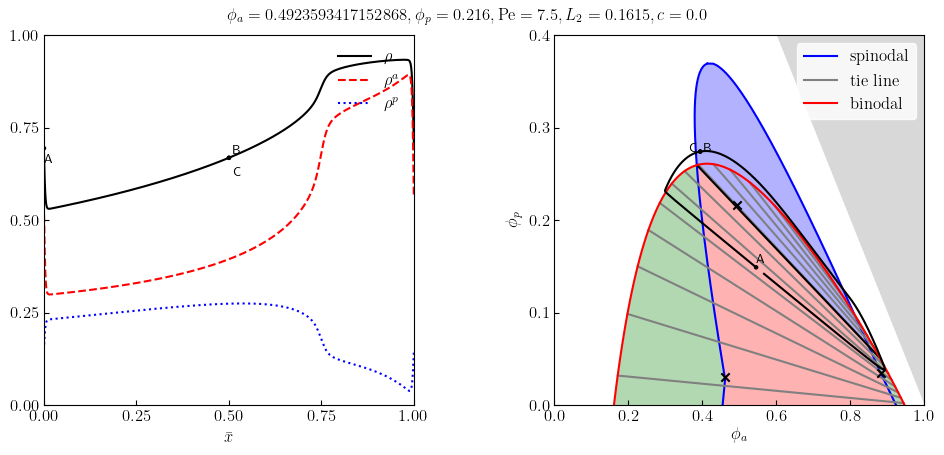

In [33]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c, Δϕ = 0.001)

In [95]:
font = 16
axs[1].annotate(L"(a)", (-0.15, 1.05), xycoords = "axes fraction", rotation = 0, fontsize = font )
axs[3].annotate(L"(b)", (-0.15, 1.05), xycoords = "axes fraction", rotation = 0, fontsize = font )
axs[5].annotate(L"(c)", (-0.15, 1.05), xycoords = "axes fraction", rotation = 0, fontsize = font )
axs[7].annotate(L"(d)", (-0.15, 1.05), xycoords = "axes fraction", rotation = 0, fontsize = font )

PyObject Text(-0.15, 1.05, '$(d)$')

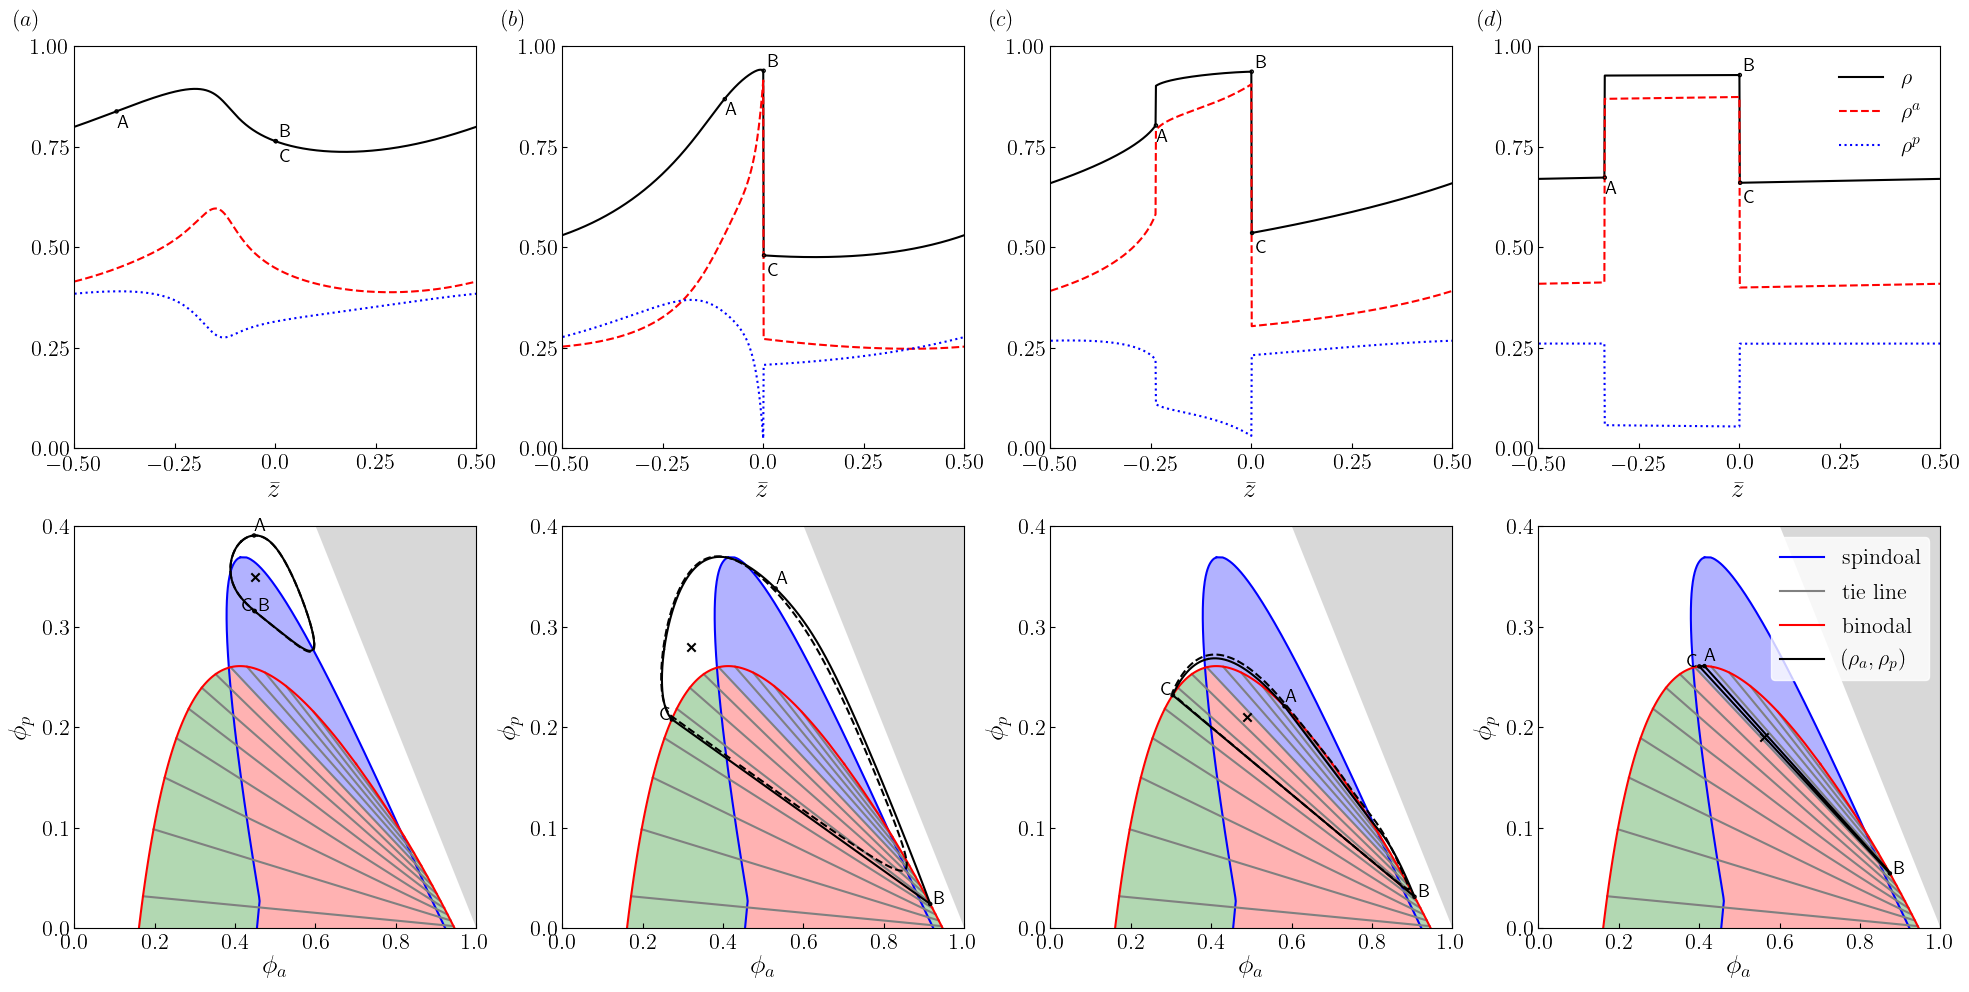

In [96]:
fig.tight_layout()
fig_name = "show_f_multi"
        @unpack v0, Lx, Δx = param
        pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";
        mkpath(pathname)
        filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/Lx=$(Lx)_Δx=$(Δx)_Pe=$(v0)_ϕa=$(ϕa)_ϕp=$(ϕp).pdf";
        PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)
display(fig)

In [53]:
using PyPlot, LaTeXStrings
fig, axs = subplots(2,2,figsize=(10,10))
rc("text", usetex=true)

In [54]:
# Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 1000, 1.4
# Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 56, 1.7369414724789993
# Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 208, 1.71
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 840, 1.5
param, ps = get_outer_param_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
f,u,c = load_out_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
# f,u,c = solve_out_6(Lx,Nx,ϕa,ϕp,v0,ind,γ,u; tol = 1e-8, maxiters =10)
# check densities
    ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
    ϕa = sum(f[:,1:2])/Nx
#
rhodiff = u[ind+1] - u[ind]
err, erri, avmag, cep = check_u_6(u,ps);
println("ϕa,ϕp=($(d4(ϕa)),$(d4(ϕp))): rhodiff=$(rhodiff), c =$(c), avmag=$(avmag), err=$(err),$(erri), ind=$(ind)")

show_f_reduced([axs[1],axs[2]],fig,16,param,f; c=c,point=ind-Nx÷2)

ϕa,ϕp=(0.4608,0.2201): rhodiff=0.14583698540986623, c =0.002778934324554162, avmag=0.2668472549466312, err=9.167291925571419e-11,837, ind=840


PyObject <matplotlib.collections.PathCollection object at 0x7f271e848580>

In [55]:
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 840, 1.5
ϕa,ϕp= 0.4608,0.2201
γ = (1-ϕa)/(1-ϕa-ϕp)
param, ps = get_outer_param_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)

ϕaL, ϕaR, ϕL, ϕR = get_BC(γ ,v0)
ϕpL, ϕpR = ϕL-ϕaL, ϕR-ϕaR
f = vcat([ϕaL/2 ϕaL/2  ϕpL] .* ones(ind-512), [ϕaR/2 ϕaR/2  ϕpR] .* ones(1024-ind),[ϕaL/2 ϕaL/2  ϕpL] .* ones(512))

show_f_reduced([axs[3],axs[4]],fig,16,param,f; c=c,point=ind-Nx÷2)
axs[3].get_legend().remove()
axs[4].get_legend().remove()

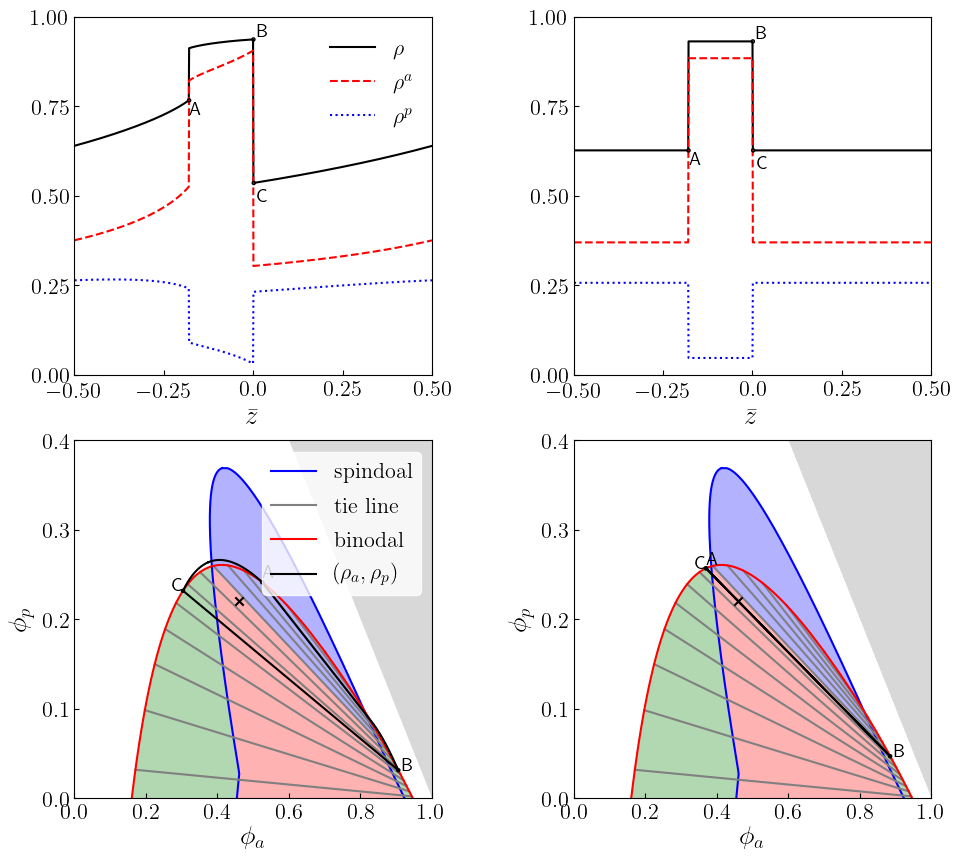

In [56]:
display(fig)

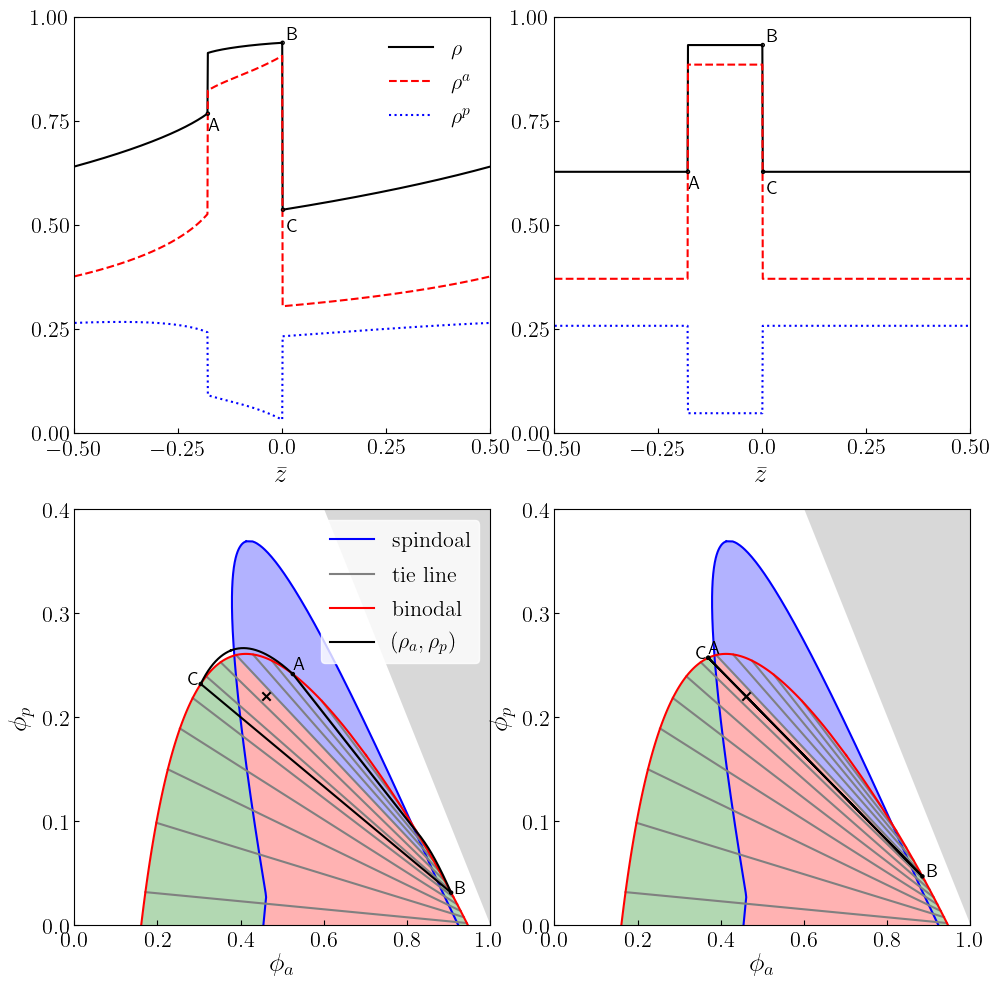

In [57]:
fig.tight_layout()
fig_name = "show_f_extra"
        @unpack v0, Lx, Δx = param
        pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";
        mkpath(pathname)
        filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/Lx=$(Lx)_Δx=$(Δx)_Pe=$(v0)_ϕa=$(ϕa)_ϕp=$(ϕp).pdf";
        PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)
display(fig)

In [67]:
using PyPlot, LaTeXStrings
sf = 0.5
fig, axs = subplots(1,2,figsize=(10,sf*6))
rc("text", usetex=true)

In [68]:
font = 12
plot_phase(fig, axs[1], 5.0, font; Lxs = [], Δϕ = 0.001, sf = sf)
plot_phase(fig, axs[2], 7.5, font; Lxs = [], Δϕ = 0.001, sf = sf)
axs[1].axis([0.3,0.9,0.0,0.08])
axs[1].get_yaxis().set_ticks(0:0.02:0.08)
axs[1].get_xaxis().set_ticks(0.3:0.15:0.9)
axs[1].set_aspect(sf*0.6/0.08)
axs[2].get_legend().remove()

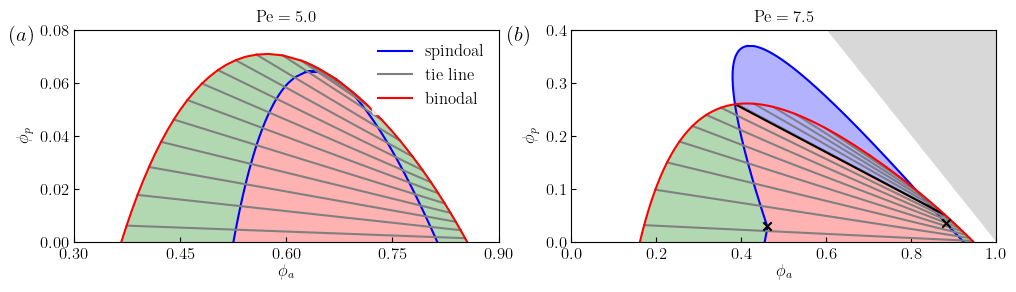

In [69]:
font = 15
axs[1].annotate(L"(a)", (-0.15, 0.95), xycoords = "axes fraction", rotation = 0, fontsize = font )
axs[2].annotate(L"(b)", (-0.15, 0.95), xycoords = "axes fraction", rotation = 0, fontsize = font )
axs[1].set_title(L"\mathrm{Pe}=5.0")
axs[2].set_title(L"\mathrm{Pe}=7.5")
display(fig)

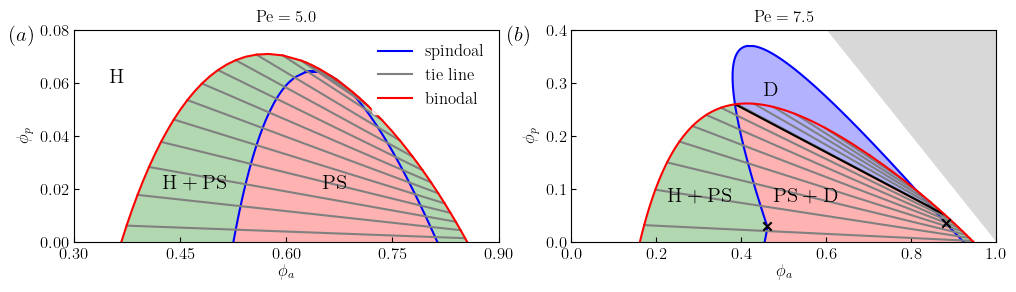

In [70]:
font = 15
axs[1].annotate(L"\mathrm{H}", (0.35, 0.06), xycoords = "data", rotation = 0, fontsize = font )
axs[1].annotate(L"\mathrm{H+PS}", (0.425, 0.02), xycoords = "data", rotation = 0, fontsize = font )
axs[1].annotate(L"\mathrm{PS}", (0.65, 0.02), xycoords = "data", rotation = 0, fontsize = font )
axs[2].annotate(L"\mathrm{H+PS}", (0.225, 0.075), xycoords = "data", rotation = 0, fontsize = font )
axs[2].annotate(L"\mathrm{PS+D}", (0.475, 0.075), xycoords = "data", rotation = 0, fontsize = font )
axs[2].annotate(L"\mathrm{D}", (0.45, 0.275), xycoords = "data", rotation = 0, fontsize = font )
# axs[2].annotate(L"\mathrm{H(+TP/CP?)}", (0.4, 0.275), xycoords = "data", rotation = 0, fontsize = font )
display(fig)

In [265]:
using SciPy

function add_TP(fig,ax; Pe = 7.5)
    Pe = 7.5
    file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/TP/Pe=$(Pe).jld2"
    data = load(file_name)
    @unpack outline = data

    left_out = [x.+[-0.005,0.005] for x in sort(outline[1:20]; by= x->x[2])];
    top_out = [[0.41,0.37],[0.42,0.37],[0.43,0.37],[0.44,0.37],[0.45,0.37]];
    right_out = [x.+[0.005, 0.005] for x in sort(outline[78:end]; by= x->x[1])];
    bottom_out = [x.- [0.00, 0.005] for x in sort(outline[21:77]; by= x->x[1], rev = true)];

    X = hcat(left_out...,top_out...,right_out...,bottom_out...,left_out[1])
    #create spline function
    f, u = SciPy.interpolate.splprep(X, s=0.001, per=true)
    #create interpolated lists of points
    xint, yint = SciPy.interpolate.splev( 0.:.001:1.,f)

    ax.plot(xint, yint; color = "purple", linestyle = "--", label = "TP")

    min_x = minimum(xint)
    max_x = maximum(xint)

    dx = (max_x-min_x)/100
    xs = min_x:dx:max_x

    g(t) = SciPy.interpolate.splev(t,f)[1][1]
    ts = hcat([find_zeros(y->(g(y)-x),(0,1)) for x in xs]...)

    h(t) = SciPy.interpolate.splev(t,f)[2][1]
    ax.fill_between(xs,h.(ts[1,:]),h.(ts[2,:]), color = "purple", alpha = 0.3, linewidth = 0)
    ax.legend()
    return fig,ax
end

add_TP(fig,axs[2]; Pe = 7.5)
display(fig)

(Figure(PyObject <Figure size 500x1000 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f4313b97bb0>)

In [71]:
#display(fig)
fig_name = "phase_plot_no_TP"
pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
mkpath(pathname)
filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/bin_spins.pdf";
PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [219]:
Pe = 5.0
Δϕ = 0.001
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
            data = load(file_name)
            @unpack ϕas_left, ϕas_right, ϕps, indl, indr = data

Dict{String, Any} with 5 entries:
  "indr"      => 27
  "indl"      => 27
  "ϕas_right" => [0.813415, 0.810067, 0.808381, 0.806686, 0.804983, 0.803271, 0…
  "ϕps"       => [0.0, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.009, 0.01, 0…
  "ϕas_left"  => [0.525428, 0.526813, 0.527519, 0.528232, 0.528954, 0.529685, 0…

In [220]:
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
                data = wload(filename)
                @unpack Pe, γs, ϕ1s, ϕ2s = data

Dict{String, Any} with 6 entries:
  "γs"         => Any[1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09…
  "average_ϕs" => [0.611395, 0.617452, 0.623418, 0.629294, 0.635085, 0.640793, …
  "ϕ1s"        => Any[0.367151, 0.380833, 0.394403, 0.407872, 0.421255, 0.43456…
  "χs"         => [1.0, 0.993804, 0.987919, 0.982328, 0.977016, 0.971972, 0.967…
  "Pe"         => 5.0
  "ϕ2s"        => Any[0.855638, 0.854071, 0.852433, 0.850717, 0.848915, 0.84702…

In [243]:
max_ϕa = maximum(ϕas_left)
                    max_ϕp = maximum(ϕps)
                    ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid_real(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ1s).+0.00001)

(Any[0.5254330602799114, 0.5298325840890747, 0.5343687784199396, 0.5390549072454401, 0.5439069497933884, 0.5489445073901895, 0.5541921494437003, 0.5596814908729976, 0.5654545539677316, 0.5715695375089839  …  0.6081213206085653, 0.6081213206085653, 0.6081183894143944, 0.6081152456613836, 0.6081117818633399, 0.6081079540141278, 0.6081035137195299, 0.6080980805631072, 0.6080905410415487, 0.6080905410415487], Any[0.8133991640804268, 0.8029260943159051, 0.7925832086715217, 0.7823542185403859, 0.7722206618879149, 0.7621610396476528, 0.752149526448067, 0.742153967400455, 0.7321326136479204, 0.7220284819921292  …  0.6707352357708944, 0.6707352357708944, 0.6707388172734049, 0.6707426585752315, 0.6707468910340304, 0.670751568452351, 0.6707569944036593, 0.6707636338444352, 0.6707728477346342, 0.6707728477346342], Any[1.0e-5, 0.006201666167193632, 0.01212194798922155, 0.01777384808812692, 0.023159819958246997, 0.02828172365734082, 0.03314076775757923, 0.03773743343419383, 0.04207137489084078, 0.04

In [242]:
γ_grid = γs
ϕ1_grid = ϕ1s
ϕ2_grid = ϕ2s
ϕp_grid = gammas_converter_p(γs, ϕ1s).+0.00001

55-element Vector{Float64}:
 1.0e-5
 0.006201666167193632
 0.01212194798922155
 0.01777384808812692
 0.023159819958246997
 0.02828172365734082
 0.03314076775757923
 0.03773743343419383
 0.04207137489084078
 0.04614128780373438
 ⋮
 0.06118410123920664
 0.06118343753523519
 0.06118272561769627
 0.061181941123404075
 0.0611810740541529
 0.06118006809407255
 0.061178836961706944
 0.06117712810312997
 0.06117712810312997

In [241]:
is_stable_value_real(0.54, 0.01; Pe = 5.0)

0.09516910202760304

In [ ]:

g(x) = is_stable_value_real(x, ϕp; Pe = Pe)

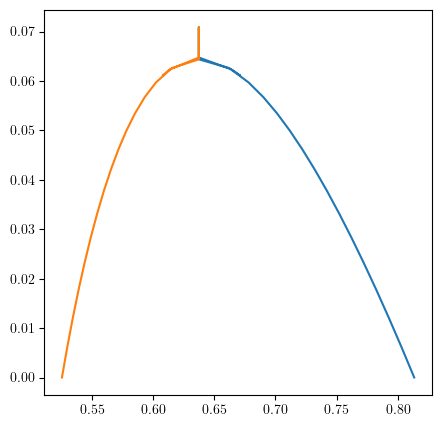

In [244]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
rc("text", usetex=true)
ax.plot(ϕas_right,ϕps)
ax.plot(ϕas_left,ϕps)
# ax.scatter(ϕas_left[indl], ϕps[indl]; color = "black", marker = "x")
# ax.scatter(ϕas_right[indr], ϕps[indr]; color = "black", marker = "x")
display(fig)

In [ ]:
ϕp = 0.0
g(x) = is_stable_value(x, ϕp; Pe = Pe)
                    # ϕal, ϕar = find_zeros(f,(1e-10,1-ϕp-1e-10))
                    ϕal, ϕar = find_zeros(g,(0.3,0.9))
                    pushfirst!(ϕas_left, ϕal)
                    pushfirst!(ϕas_right, ϕar)
                    pushfirst!(ϕps, ϕp)

In [160]:
maximum(ϕas_left)

0.6373665663791289

In [157]:
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
            data = Dict{String,Any}()
            @pack! data = ϕas_left, ϕas_right, ϕps, indl, indr
            safesave(file_name,data)

In [188]:
# grid_name = "binodal_1_$(Δϕ)_$(Pe)"

grid_name = "binodal_2_$(Δϕ)_$(Pe)"


"binodal_2_0.001_5.0"

In [198]:
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/$(grid_name).jld2"
data = load(file_name)
@unpack ϕas_left, ϕas_right, ϕps, γs, ϕ1s, ϕ2s = data
# nϕps = [z for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.6373665663791289)]
# nϕas_right = [y for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.6373665663791289)]
# nϕas_left = [x for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.6373665663791289)]
# nϕas_left = [x for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.6373665663791289)]
# γs  = [x for (x,y,z) in zip(γs,ϕas_right,ϕps) if (y>0.6373665663791289) ]
# ϕ1s = [x for (x,y,z) in zip(ϕ1s,ϕas_right,ϕps) if (y>0.6373665663791289) ]
# ϕ2s = [x for (x,y,z) in zip(ϕ2s,ϕas_right,ϕps) if (y>0.6373665663791289)]

# ϕas_left, ϕas_right, ϕps = nϕas_left, nϕas_right, nϕps

# file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/$(grid_name).jld2"
#         data = Dict{String,Any}()
#         @pack! data = ϕas_left, ϕas_right, ϕps, γs, ϕ1s, ϕ2s
#         safesave(file_name,data)



Dict{String, Any} with 6 entries:
  "γs"        => [1.0, 1.01, 1.02, 1.03, 1.05, 1.06, 1.07, 1.09, 1.1, 1.11  …  …
  "ϕ1s"       => [0.367151, 0.380833, 0.394403, 0.407872, 0.434566, 0.447821, 0…
  "ϕas_right" => [0.813398, 0.810959, 0.808446, 0.805856, 0.800411, 0.797541, 0…
  "ϕps"       => [1.0e-5, 0.00146929, 0.00296134, 0.0044885, 0.00765896, 0.0093…
  "ϕas_left"  => [0.525434, 0.526443, 0.527491, 0.528584, 0.530919, 0.532171, 0…
  "ϕ2s"       => [0.855638, 0.854071, 0.852433, 0.850717, 0.847021, 0.845023, 0…

In [201]:
gammas_converter_p(γs, ϕ1s)

34-element Vector{Float64}:
 0.0
 0.006191666167193632
 0.01211194798922155
 0.01776384808812692
 0.02827172365734082
 0.03313076775757923
 0.037727433434193824
 0.04613128780373438
 0.049934733598064995
 0.05346790125561651
 ⋮
 0.06173664845870375
 0.06173664845870375
 0.06122721442255885
 0.06122721442255885
 0.06122721442255885
 0.06120262361767814
 0.06117006809407255
 0.061167128103129964
 0.061167128103129964

In [204]:
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
                data = wload(filename)
                @unpack Pe, γs, ϕ1s, ϕ2s = data

Dict{String, Any} with 6 entries:
  "γs"         => Any[1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09…
  "average_ϕs" => [0.611395, 0.617452, 0.623418, 0.629294, 0.635085, 0.640793, …
  "ϕ1s"        => Any[0.367151, 0.380833, 0.394403, 0.407872, 0.421255, 0.43456…
  "χs"         => [1.0, 0.993804, 0.987919, 0.982328, 0.977016, 0.971972, 0.967…
  "Pe"         => 5.0
  "ϕ2s"        => Any[0.855638, 0.854071, 0.852433, 0.850717, 0.848915, 0.84702…

In [205]:
γs

55-element Vector{Any}:
 1.0
 1.01
 1.02
 1.03
 1.04
 1.05
 1.06
 1.07
 1.08
 1.09
 ⋮
 1.22823031
 1.2282303110000001
 1.228230312
 1.228230313
 1.2282303140000002
 1.228230315
 1.228230316
 1.228230317
 1.228230317